In [136]:
%load_ext autoreload
%autoreload 2
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
# from lib_nn_dpe import NN_dpe
from IPython import display

import serial
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
dpe = DPE('COM3')
dpe.set_clock(50)
# dpe.shape

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


## Read operation

Vread should be always between 0 and 0.45 (V)

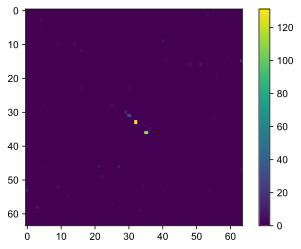

In [138]:
g = dpe.read(0, method='fast', Tdly=500, Vread=0.2)
plt.imshow(g * 1e6)
plt.colorbar()

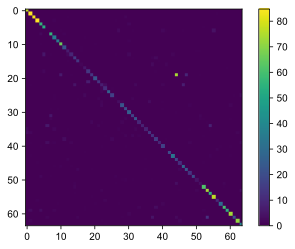

In [139]:
g = dpe.read(1, method='fast', Tdly=500, Vread=0.2)
plt.imshow(g *1e6)
plt.colorbar()

## Matrix multiplication

In [140]:
N = 100
vec_input = np.random.random((64, N))

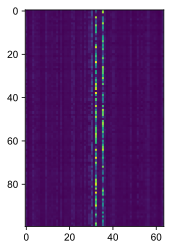

In [141]:
dpe.N_BIT = 8

vec_output = dpe.multiply(0, vec_input, c_sel=[0, 64], Vread=0.2, Tdly=500)

plt.imshow(vec_output)

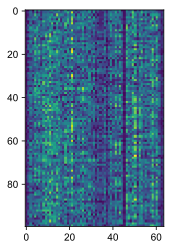

In [9]:
vec_output_soft = g @ vec_input
plt.imshow(vec_output_soft.T)

In [64]:
N = 100
vec_input = np.random.random((16, N))

vec_output = dpe.multiply(0, vec_input, c_sel=[0, 64], Vread=0.2, r_start=16, Tdly=500)

## Programming

In [11]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
# Scale the conductances by 4x to get better separation
G_neg = 4*mat_contents['G_neg']
G_pos = 4*mat_contents['G_pos']

arr = 0
Vgate = 5
Vref = 0.5
vRead = 0.2

targetTolerance = 4e-6

targetGNeg = np.zeros((64,64)) 
targetGNeg[0:64,0:64] = G_neg[0:64,0:64]

targetGPos = np.zeros((64,64))
targetGPos[0:64,0:64] = G_pos[0:64,0:64]

MselPos = np.zeros((64,64))
MselPos[np.nonzero(targetGPos)] = 1

MselNeg = np.zeros((64,64))
MselNeg[np.nonzero(targetGNeg)] = 1

In [72]:
dataChip39Arr0_GPos1 = dpe.tune_conductance(0, targetGPos, saveHistory=True, maxSteps=50, maxRetry=2, method='fast', vSetRamp = [0.4, 2.6, 0.1], 
                                     vGateSetRamp = [0.3, 1.4, 0.05], vResetRamp = [0.3, 2.6, 0.1], vGateResetRamp = [5.0, 5.5, 0.5], TwidthSet=40e-9, TwidthReset=1e-3, 
                                     Gtol_in=5e-6, Gtol_out=15e-6, Msel=MselPos, numReads=3)

Start programming, step=49, maxBound=0 yield= 55.65% - 80.65%
34.0 devices to be programmed...reset 0.0, set 34.0
Setting 34 devices...
Programming with internal timing P_RESET=3
Resetting 0 devices...
Programming with external timing Twidth=1000.000 us


In [84]:
dataChip39Arr0_GPos1 = dpe.tune_conductance(0, targetGPos, saveHistory=True, maxSteps=100, maxRetry=2, method='fast', vSetRamp = [0.4, 2.6, 0.05], 
                                     vGateSetRamp = [0.3, 1.4, 0.01], vResetRamp = [0.3, 2.6, 0.1], vGateResetRamp = [5.0, 5.5, 0.5], TwidthSet=40e-9, TwidthReset=1e-3, 
                                     Gtol_in=2e-6, Gtol_out=5e-6, Msel=MselPos, numReads=3)

Start programming, step=99, maxBound=0 yield= 26.61% - 47.58%
80.0 devices to be programmed...reset 1.0, set 79.0
Setting 79 devices...
Programming with internal timing P_RESET=3
Resetting 1 devices...
Programming with external timing Twidth=1000.000 us


In [66]:
dataChip39Arr0_GPos1 = dpe.tune_conductance(0, targetGPos, saveHistory=True, maxSteps=200, maxRetry=2, method='fast', vSetRamp = [0.4, 2.6, 0.1], 
                                     vGateSetRamp = [0.3, 1.4, 0.05], vResetRamp = [0.3, 2.6, 0.1], vGateResetRamp = [5.0, 5.5, 0.5], TwidthSet=40e-9, TwidthReset=1e-3, 
                                     Gtol_in=0.2, Gtol_out=0.25, Msel=MselPos, numReads=3,GtolType='rel')

Start programming, step=49, maxBound=0 yield= 55.65% - 66.13%
43.0 devices to be programmed...reset 4.0, set 39.0
Setting 39 devices...
Programming with internal timing P_RESET=3
Resetting 4 devices...
Programming with external timing Twidth=1000.000 us


In [121]:
from lib_tune_g import *

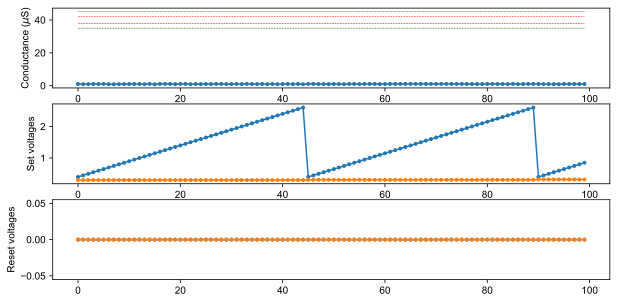

In [135]:
plot_history(37, 36, dataChip39Arr0_GPos1)